In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [11]:
proj_root = Path().resolve().parents[0]
data_file = proj_root / "data" / "raw" / "hpq_ds" / "HPQ_LOWFRAME.csv"
df = pd.read_csv(data_file, delimiter=',',
                 usecols=['Date', 'Open', 'High', 'Low', 'Close'])

print("✅ Loaded:", data_file)
df.head()

✅ Loaded: /Users/discovery/models/stock_predictor/data/raw/hpq_ds/HPQ_LOWFRAME.csv


,Date,Open,High,Low,Close
0,1962-01-02 00:00:00-05:00,0.043679,0.043679,0.041318,0.041318
1,1962-01-03 00:00:00-05:00,0.041318,0.041318,0.040433,0.040875
2,1962-01-04 00:00:00-05:00,0.040875,0.042203,0.039252,0.039990
3,1962-01-05 00:00:00-05:00,0.039842,0.039842,0.039105,0.039105
4,1962-01-08 00:00:00-05:00,0.039105,0.039695,0.038367,0.039695


In [12]:
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close
0,1962-01-02 00:00:00-05:00,0.043679,0.043679,0.041318,0.041318
1,1962-01-03 00:00:00-05:00,0.041318,0.041318,0.040433,0.040875
2,1962-01-04 00:00:00-05:00,0.040875,0.042203,0.039252,0.039990
3,1962-01-05 00:00:00-05:00,0.039842,0.039842,0.039105,0.039105
4,1962-01-08 00:00:00-05:00,0.039105,0.039695,0.038367,0.039695


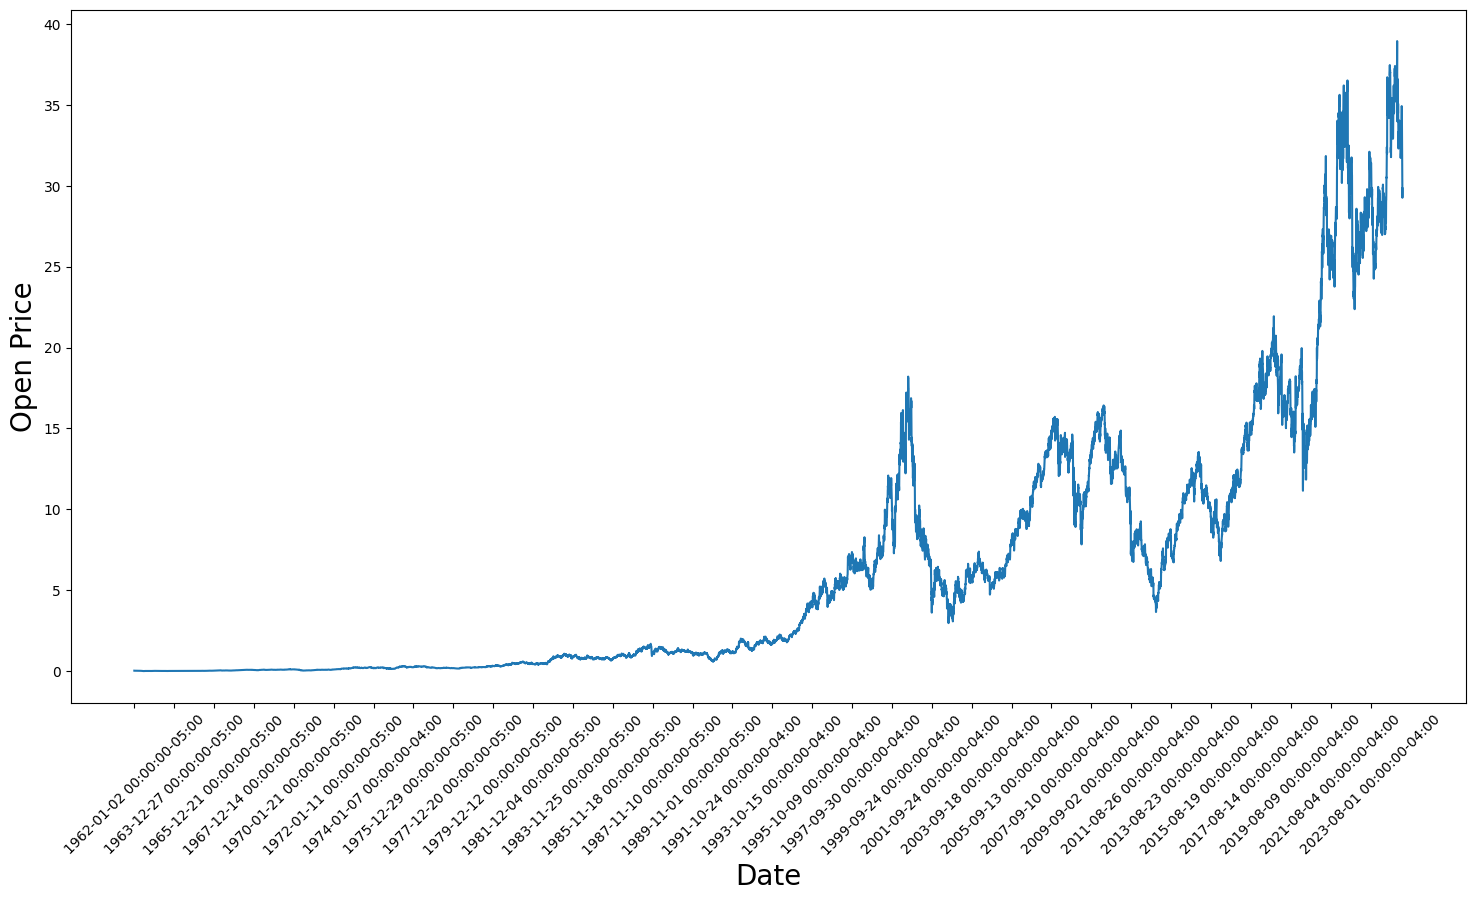

In [20]:
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]), df['Open'])
plt.xticks(range(0, df.shape[0], 500), df['Date'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Open Price', fontsize=20)
plt.show()

In [21]:
D = df.iloc[:, 1:2].values

In [22]:
D.shape

(15902, 1)

In [23]:
Tr_set = D[:11000]
Ts_set = D[11000:]

In [30]:
Tr_set.shape

(11000, 1)

In [33]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [34]:
sc = MinMaxScaler(feature_range=(0, 1))

In [35]:
Tr_scaled = sc.fit_transform(Tr_set)
Ts_scaled = sc.fit_transform(Ts_set)

In [38]:
seq_len = 100
X_train = []
y_train = []
for i in range(seq_len, len(Tr_scaled)-seq_len):
    X_train.append(Tr_scaled[i-seq_len:i, 0])
    y_train.append(Tr_scaled[i, 0])

In [40]:
type(X_train)

list

In [41]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [42]:
X_train[0]

array([0.00141183, 0.00128201, 0.00125765, 0.00120086, 0.0011603 ,
       0.00119276, 0.0012252 , 0.00124142, 0.00123332, 0.00121709,
       0.00118464, 0.0011603 , 0.00115218, 0.00116841, 0.00126578,
       0.00128201, 0.00123332, 0.00121709, 0.00121709, 0.00120086,
       0.00116841, 0.0012252 , 0.0012252 , 0.00119276, 0.00119276,
       0.00116841, 0.00117653, 0.00112785, 0.00112785, 0.00113595,
       0.00115218, 0.00110349, 0.00107104, 0.0010467 , 0.00107104,
       0.00107916, 0.00109539, 0.00112785, 0.00113595, 0.00116841,
       0.00118464, 0.00116841, 0.00118464, 0.00117653, 0.00115218,
       0.00115218, 0.0011603 , 0.00120086, 0.00123332, 0.0012252 ,
       0.0012252 , 0.00118464, 0.00118464, 0.00121709, 0.0012252 ,
       0.00121709, 0.0012252 , 0.0012252 , 0.00126578, 0.00121709,
       0.00120086, 0.0012252 , 0.0012252 , 0.00120086, 0.00120086,
       0.00110349, 0.00102235, 0.0010467 , 0.00101425, 0.00102235,
       0.00105481, 0.0010467 , 0.00100612, 0.00100612, 0.00094

In [43]:
len(X_train[0])

100

In [44]:
y_train[0]

np.float64(0.0006572223353109553)

In [45]:
X_test = []
y_test = []
for i in range(seq_len, len(Ts_scaled)-seq_len):
    X_test.append(Ts_scaled[i-seq_len:i, 0])
    y_test.append(Ts_scaled[i, 0])

In [46]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [50]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [51]:
X_train.shape

(10800, 100, 1)

In [53]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [54]:
X_test.shape

(4702, 100, 1)

In [63]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,
               input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/Users/discovery/models/stock_predictor/venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model.compile(optimizer='adam', loss=tf.keras.losses.mse)

In [65]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - loss: 0.0011
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 5.6771e-04
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - loss: 5.7222e-04
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 4.8587e-04
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 4.6921e-04


In [66]:
y_hat = model.predict(X_test)

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [67]:
y_hat.shape

(4702, 1)

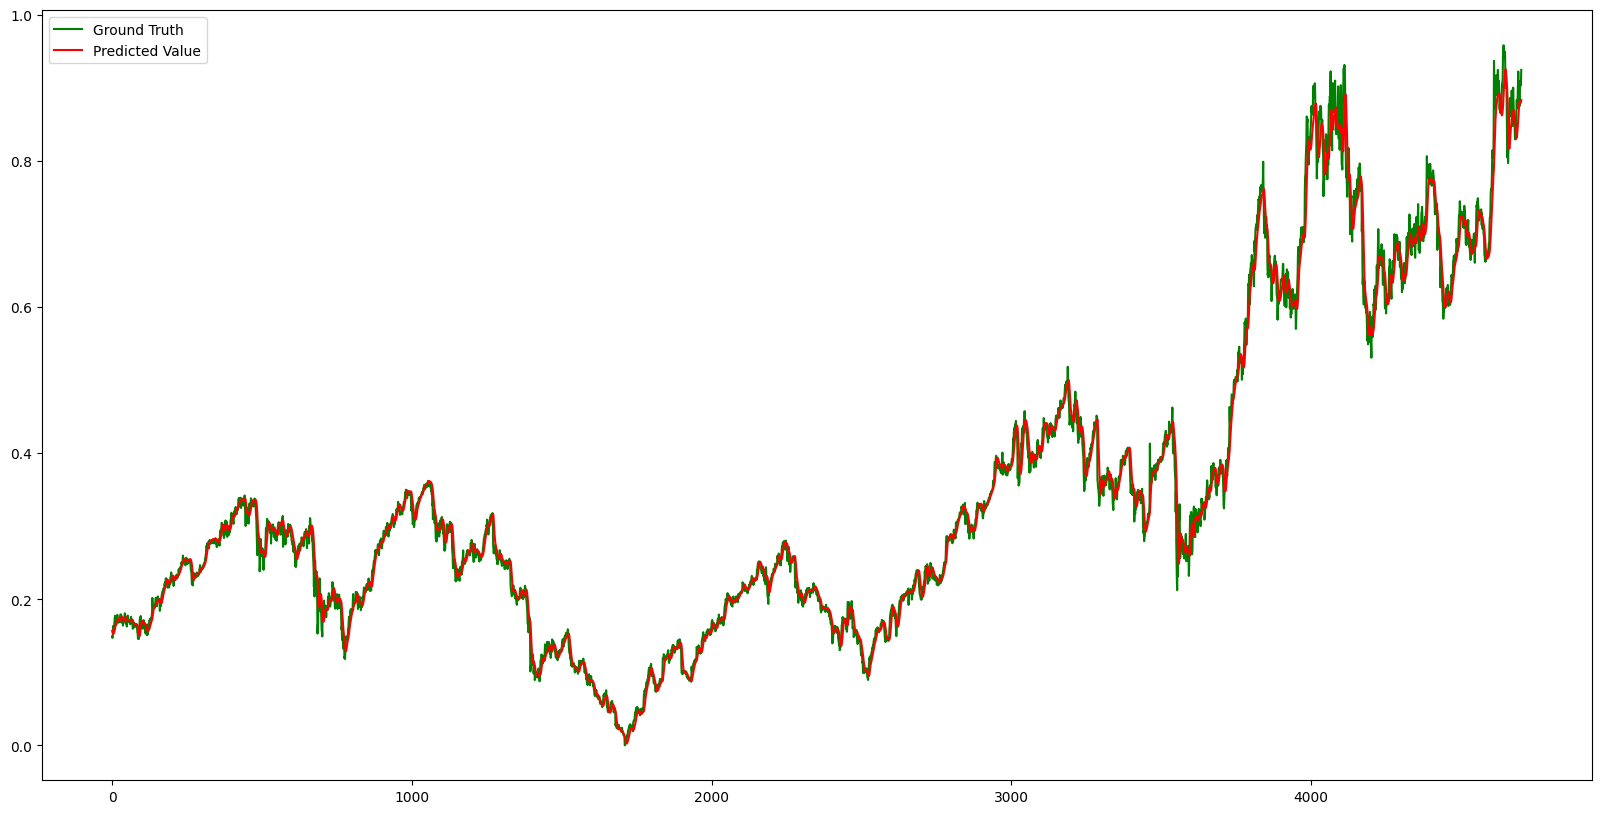

In [68]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, color='green', label='Ground Truth')
plt.plot(y_hat, color='red', label='Predicted Value')
plt.legend()
plt.show()
